In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# FEATURES_FRIENDS = pd.read_csv('/home/docker_current/datasets/VK/FINAL_FEATURES_FRIENDS.tsv', sep = '\t')

In [3]:
# SEQUENCES_TRAINTEST = pd.read_csv('FINAL_ALL_SEQUENCES_TRAINTEST.tsv', sep = '\t')
# SEQUENCES_MATRIX = pd.read_csv('FINAL_SEQUENCES_MATRIX.tsv', sep = '\t')

FEATURES_TRAINTEST = pd.read_csv('/home/docker_current/datasets/VK/FINAL_FEATURES_TRAINTEST.tsv', sep = '\t')
TARGETS_DATES_TRAINTEST = pd.read_csv('/home/docker_current/datasets/VK/FINAL_TARGETS_DATES_TRAINTEST.tsv', sep = '\t')

In [4]:
FEATURES_TRAINTEST.head()

,CLIENT_ID,i1047,i1048,i1056,i1058,i1059,i1060,i1065,i1066,i1067,...,u8=17,u8=18,u8=19,u8=2,u8=20,u8=21,u8=6,u8=7,u8=8,u8=9
0,7150,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7154,0.0,16.0,156.0,0.0,0.0,20.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7156,0.0,5.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26966,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,26993,0.0,27.0,153.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
TARGETS_DATES_TRAINTEST.head()

,CLIENT_ID,RETRO_DT,TARGET
0,1011725,20210501,0
1,1018784,20210501,1
2,1021812,20210501,0
3,1024003,20210501,0
4,1025140,20210501,test


In [6]:
len(FEATURES_TRAINTEST), len(TARGETS_DATES_TRAINTEST)

(159288, 159290)

In [7]:
data = TARGETS_DATES_TRAINTEST.merge(FEATURES_TRAINTEST, how='inner')
del TARGETS_DATES_TRAINTEST, FEATURES_TRAINTEST

In [8]:
import pickle
with open('important_feat.pickle', 'rb') as handle:
    selected_feat = pickle.load(handle)

In [9]:
trainval_data = data[data['TARGET'] != 'test']
trainval_target = trainval_data['TARGET']
trainval_feat = trainval_data.drop(['RETRO_DT', 'TARGET', 'CLIENT_ID'], axis=1)

selective = False

if selective:
    trainval_feat = trainval_feat[selected_feat]

trainval_feat.head()

,i1047,i1048,i1056,i1058,i1059,i1060,i1065,i1066,i1067,i1068,...,u8=17,u8=18,u8=19,u8=2,u8=20,u8=21,u8=6,u8=7,u8=8,u8=9
0,0.0,0.0,304.0,0.0,0.0,28.0,165.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,3.0,157.0,0.0,0.0,0.0,92.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,250.0,314.0,3.0,12.0,525.0,107.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,4.0,17.0,0.0,3.0,3.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,255.0,0.0,17.0,0.0,168.0,0.0,21.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
X_train, X_val, y_train, y_val = train_test_split(trainval_feat, trainval_target, 
                                                    test_size=0.25, random_state=42, stratify=trainval_target)

In [28]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(task_type="GPU",
                           devices='0:1',
                            metric_period=25,
                            silent=False)

# eval_metric="AUC",

model.fit(X_train,
          y_train,
          eval_set=[(
        X_val, 
        y_val)],
          verbose=True)

Learning rate set to 0.048328
0:	learn: 0.6825742	test: 0.6825937	best: 0.6825937 (0)	total: 15ms	remaining: 14.9s
25:	learn: 0.5896096	test: 0.5903704	best: 0.5903704 (25)	total: 364ms	remaining: 13.6s
50:	learn: 0.5792224	test: 0.5810560	best: 0.5810560 (50)	total: 704ms	remaining: 13.1s
75:	learn: 0.5760880	test: 0.5790675	best: 0.5790675 (75)	total: 1.05s	remaining: 12.7s
100:	learn: 0.5740233	test: 0.5781980	best: 0.5781980 (100)	total: 1.38s	remaining: 12.3s
125:	learn: 0.5724556	test: 0.5776053	best: 0.5776053 (125)	total: 1.71s	remaining: 11.9s
150:	learn: 0.5711798	test: 0.5772414	best: 0.5772414 (150)	total: 2.04s	remaining: 11.5s
175:	learn: 0.5700137	test: 0.5769712	best: 0.5769712 (175)	total: 2.38s	remaining: 11.1s
200:	learn: 0.5690014	test: 0.5767960	best: 0.5767960 (200)	total: 2.69s	remaining: 10.7s
225:	learn: 0.5678679	test: 0.5766204	best: 0.5766204 (225)	total: 3s	remaining: 10.3s
250:	learn: 0.5664654	test: 0.5763750	best: 0.5763750 (250)	total: 3.34s	remaining: 

In [29]:
from sklearn.metrics import roc_auc_score

preds_class = model.predict_proba(X_val)

roc_auc_score(y_val.values, preds_class[:, 1])

0.6009690270154029

In [30]:
#Случайная модель
import numpy as np
random_preds = np.random.uniform(low=0.0, high=1.0, size=y_val.values.shape)

roc_auc_score(y_val.values, random_preds)

0.5001971661417658

In [31]:
roc_auc_score(y_train.values, model.predict_proba(X_train)[:, 1])

0.7305753684758014

In [32]:
importances = {j:i for i,j in zip(model.feature_importances_, model.feature_names_)}
importances = {k: v for k, v in sorted(importances.items(), key=lambda item: -item[1])}
importances

{'i4500': 1.996185219072019,
 'i831': 1.5118411534323524,
 'i1748': 1.4861647620262086,
 'i4292': 1.3368496445831244,
 'i715': 1.253804890466351,
 'i3534': 1.0823851673029945,
 'i1667': 1.077778412513923,
 'i1411': 1.012662349399743,
 'i4488': 1.0009468551504135,
 'u1=187': 0.947293151716479,
 'u2=75': 0.9395799627541692,
 'u2=76': 0.9253648055033371,
 'u7=1.5': 0.8854228265954526,
 'i1147': 0.7486340995746887,
 'i890': 0.7245622297132949,
 'i883': 0.7036744791607783,
 'i4492': 0.6809737667892106,
 'i3358': 0.6797265887351355,
 'i1681': 0.6779243152127553,
 'u1=160': 0.6741486165014315,
 'i1598': 0.6690426626564483,
 'u0=22': 0.6670162437482794,
 'i1092': 0.6607646078198701,
 'i3350': 0.6426106942892886,
 'u2=66': 0.6390701446913666,
 'u2=15': 0.6268282159068703,
 'u2=83': 0.6054960925548508,
 'i588': 0.6021666545893964,
 'u2=19': 0.5896905022430672,
 'i453': 0.5797157167156543,
 'i1457': 0.5740607351502044,
 'u0=124': 0.5453332836812852,
 'u4=3': 0.5284987626070586,
 'u2=6': 0.5237875

In [33]:
# import pickle 

# with open('filename.pickle', 'wb') as handle:
#     pickle.dump(importances, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [34]:
all_variance = sum([importances[j] for j in importances.keys()])
all_variance

99.99999999999991

In [35]:
current_sum = 0

explainable_variation = []

for key in importances.keys():
    current_sum += importances[key]
    explainable_variation.append(current_sum / all_variance)

(0.0, 100.5)

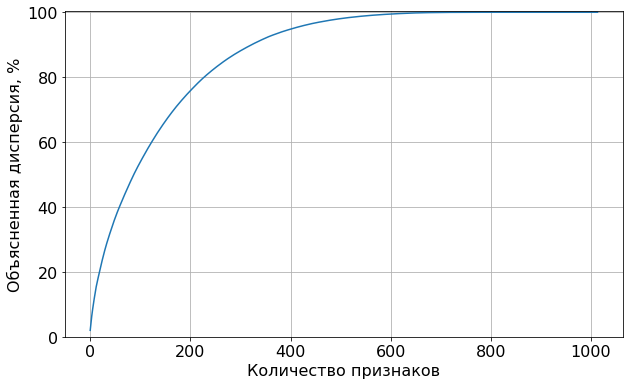

In [48]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = '16'

plt.figure(figsize=(10, 6))
plt.plot([i*100 for i in explainable_variation])
plt.grid()
plt.xlabel('Количество признаков')
plt.ylabel('Объясненная дисперсия, %')
plt.ylim(0, 100.5)

In [126]:
import_feat = []

for ind in range(200):
    import_feat.append(list(importances.keys())[ind])


In [129]:
# with open('important_feat.pickle', 'wb') as handle:
#     pickle.dump(import_feat, handle, protocol=pickle.HIGHEST_PROTOCOL)